In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import os
from selenium.common.exceptions import NoSuchElementException
import requests

In [28]:
countries = ['india','italy','belgium','netherlands','israel','france']

In [29]:
final=[]
j=0
response = requests.get('https://www.worldometers.info/coronavirus/country/spain/')
text=response.text
text=text[text.find('\'Total Cases\'\n        },\n\n'):]
text=text[text.find('categories:'):]
text=text[text.find('[')+1:]
text=text[:text.find(']')]
main = text.strip('][').split(',')
final.append(main)
for q in countries :
    response = requests.get('https://www.worldometers.info/coronavirus/country/'+q+'/')
    m=response.text
    m=m[m.find('\'Total Cases\'\n        },\n\n'):]
    m=m[m.find('data:'):]
    m=m[m.find('['):]
    m=m[:m.find('responsive:')]
    m=m[:m.find(']')]
#     response = requests.get('https://www.worldometers.info/coronavirus/country/'+q+'/')
#     a=response.text
#     m=a[a.find('data:'):]
#     m=m[:m.find('responsive:')]
#     m=m[m.find('data:')+7:m.find(']')]
    f = m.strip('][').split(',') 
    f = [int(i) for i in f]
    final.append(f)
    j=j+1


In [30]:
countries.insert(0,'date')
countries_data_cases=pd.DataFrame(final)
countries_data_cases
countries_data_cases=countries_data_cases.transpose()
countries_data_cases.columns=countries
countries_data_cases
countries_data_cases.set_index('date',inplace=True)
df=countries_data_cases

Text(0, 0.5, 'Number of Cases')

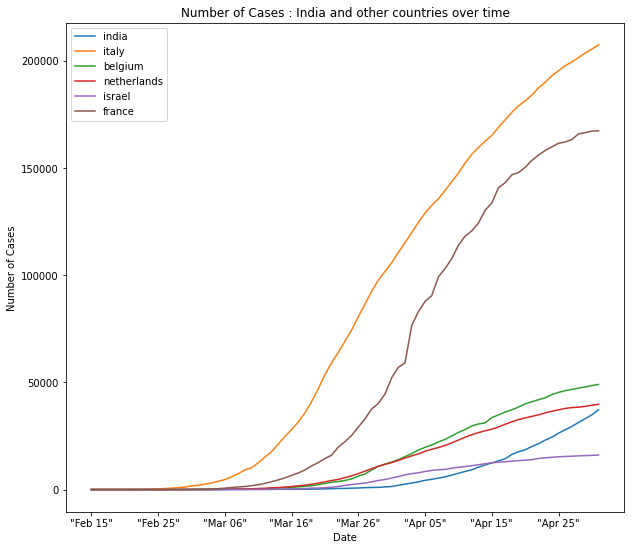

In [31]:
# df=df.astype(float)
pt=df.plot(figsize=(10,9),title='Number of Cases : India and other countries over time')
pt.set_xlabel('Date')
pt.set_ylabel('Number of Cases')

In [32]:
countries.remove('date')
l=[]
j=0
mini = 99999
for i in countries:
    l.append((df[df[i]>1000][i]).tolist())
    

In [33]:
new_data=pd.DataFrame(l)
new_data=new_data.transpose()
new_data.columns = countries

Text(0, 0.5, 'Number of Cases')

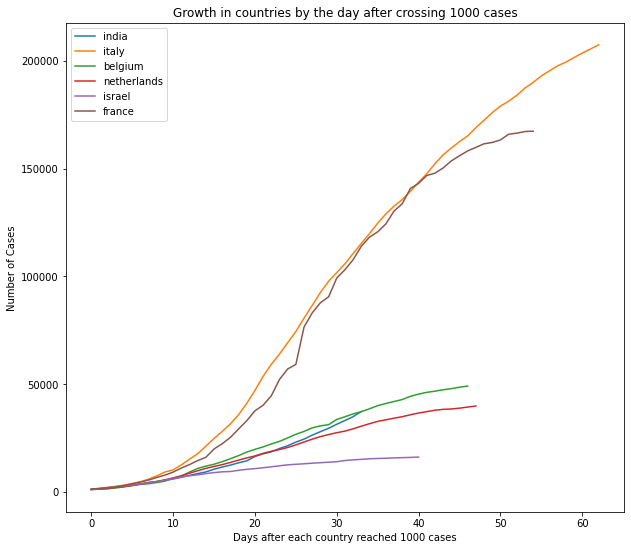

In [34]:
pt=new_data.plot(figsize=(10,9),style="-",title='Growth in countries by the day after crossing 1000 cases')
pt.set_xlabel('Days after each country reached 1000 cases')
pt.set_ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

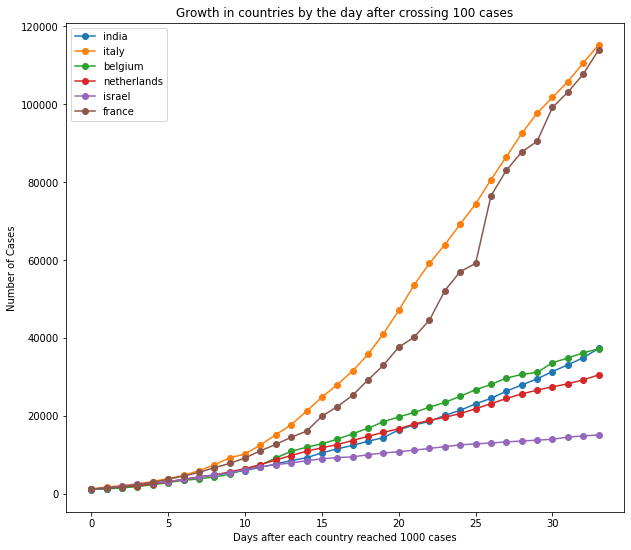

In [35]:
pt=new_data.dropna().plot(figsize=(10,9),use_index=True,style="-o",title='Growth in countries by the day after crossing 100 cases')
pt.set_xlabel('Days after each country reached 1000 cases')
pt.set_ylabel('Number of Cases')

In [36]:
a=[]

for i in range(len(new_data.dropna()['india'])):
    a.append('Day '+str(i+1))
f=new_data.dropna()
f['a']=a
f.set_index('a',inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of Cases')

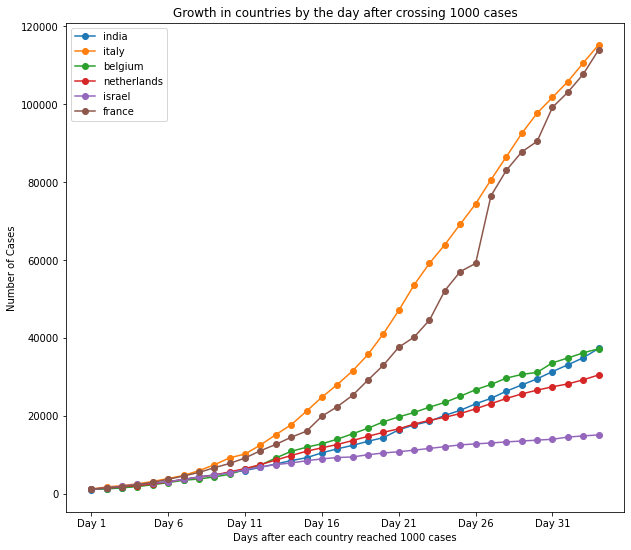

In [37]:
pt=f.plot(figsize=(10,9),style="-o",title='Growth in countries by the day after crossing 1000 cases')
pt.set_xlabel('Days after each country reached 1000 cases')
pt.set_ylabel('Number of Cases')